<a href="https://colab.research.google.com/github/Amoghkori/steganography/blob/main/reveal_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
import sys
from keras.models import Model
from keras.utils import plot_model
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from random import randint
import imageio
import argparse
from skimage.util.shape import view_as_blocks


In [ ]:
model_reveal=load_model("/content/drive/MyDrive/models_mix/reveal2.h5",compile=False)


In [ ]:
def normalize_batch(imgs):
    '''Performs channel-wise z-score normalization'''

    return (imgs -  np.array([0.485, 0.456, 0.406])) /np.array([0.229, 0.224, 0.225])

# Denormalize outputs
def denormalize_batch(imgs,should_clip=True):
    imgs= (imgs * np.array([0.229, 0.224, 0.225])) + np.array([0.485, 0.456, 0.406])
    
    if should_clip:
        imgs= np.clip(imgs,0,1)
    return imgs

# Custom block shuffling
def shuffle(im, inverse = False):
  
  # Configure block size, rows and columns
  blk_size=56
  rows=np.uint8(img.shape[0]/blk_size)
  cols=np.uint8(img.shape[1]/blk_size)

  # Create a block view on image
  img_blks=view_as_blocks(im,block_shape=(blk_size,blk_size,3)).squeeze()
  img_shuff=np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)

  # Secret key maps
  map={0:2, 1:0, 2:3, 3:1}
  inv_map = {v: k for k, v in map.items()}

  # Perform block shuffling
  for i in range(0,rows):
    for j in range(0,cols):
     x,y = i*blk_size, j*blk_size
     if(inverse):
      img_shuff[x:x+blk_size, y:y+blk_size] = img_blks[inv_map[i],inv_map[j]]
     else:
      img_shuff[x:x+blk_size, y:y+blk_size] = img_blks[map[i],map[j]]
      
  return img_shuff


In [ ]:
stego_image = np.array(Image.open("/content/container3.png").convert('RGB')).reshape(1,224,224,3)/255.0

In [ ]:
secretout=model_reveal.predict([normalize_batch(stego_image)])

In [ ]:
secretout = denormalize_batch(secretout)
secretout=np.squeeze(secretout)*255.0
secretout=np.uint8(secretout)

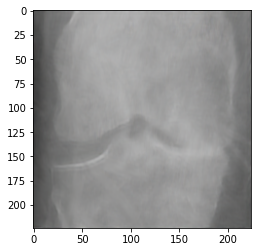

In [ ]:
imageio.imsave("secretout3.png",secretout)
plt.imshow(secretout)